# Fraud Detection using different sampling methods

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/kaggle/input/paysim1/PS_20174392719_1491204439457_log.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [ ]:
df[df['isFraud']==1]['type'].value_counts()

type
CASH_OUT    4116
TRANSFER    4097
Name: count, dtype: int64

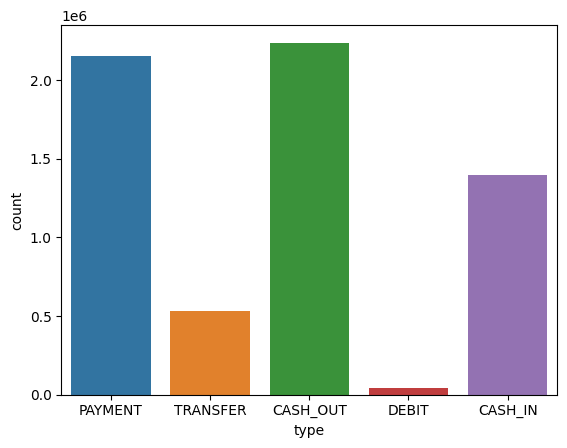

In [ ]:
sns.countplot(x='type', data=df)
plt.show()

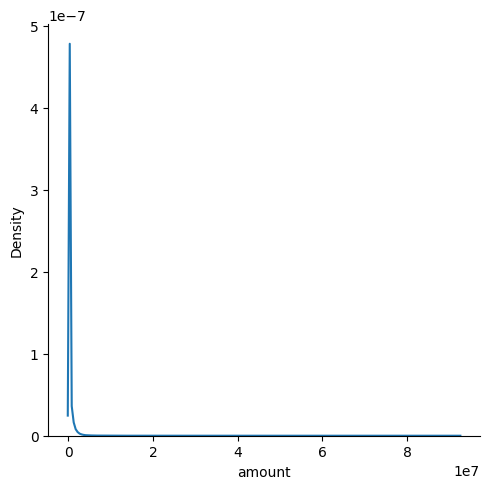

In [ ]:
sns.displot(data=df, x="amount", kind="kde")

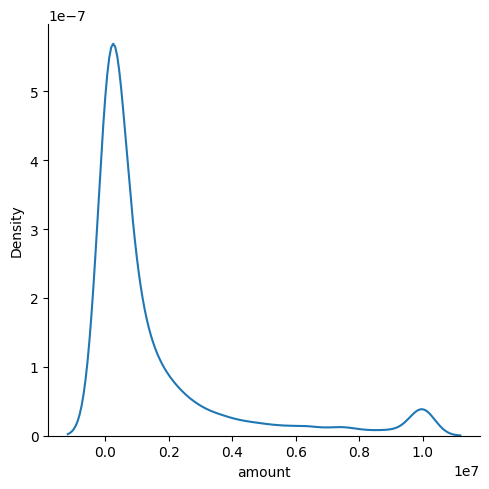

In [ ]:
sns.displot(data=df[df['isFraud']==1], x="amount", kind="kde")

In [ ]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7841475496c0>,
 [Text(-1.099990955625572, 0.004460666087110192, 'NotFraud'),
  Text(1.0999909559371663, -0.004460589247970448, 'Fraud')],
 [Text(-0.5999950667048575, 0.002433090592969195, '99.87%'),
  Text(0.599995066874818, -0.002433048680711153, '0.13%')])

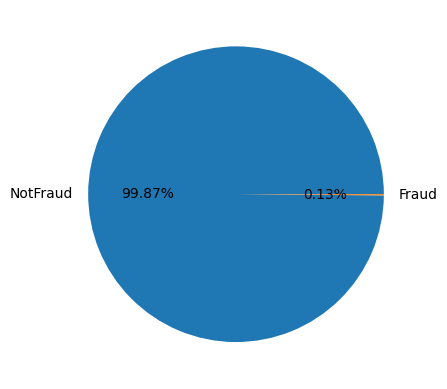

In [ ]:
fraud_val = df['isFraud'].value_counts().values
plt.pie(fraud_val, labels = ['NotFraud','Fraud'],autopct='%.2f%%')

In [ ]:
df[df['isFlaggedFraud']==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


The above df indicates that all flagged txns are fraud

In [ ]:
df[df['isFlaggedFraud']==1].amount.min()

353874.22

In [ ]:
df[df['isFlaggedFraud']==1]['type'].value_counts()

type
TRANSFER    16
Name: count, dtype: int64

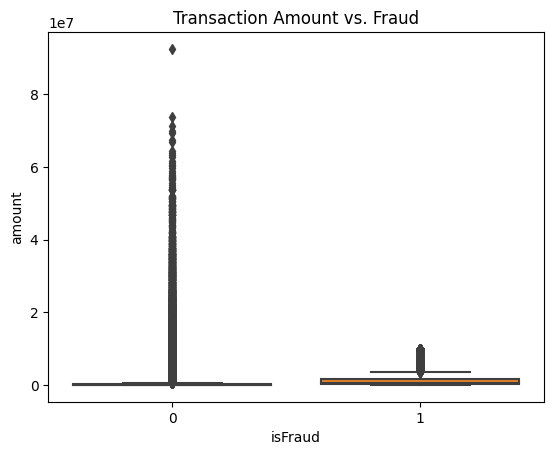

In [ ]:
sns.boxplot(x='isFraud', y='amount', data=df)
plt.title("Transaction Amount vs. Fraud")
plt.show()

<Axes: >

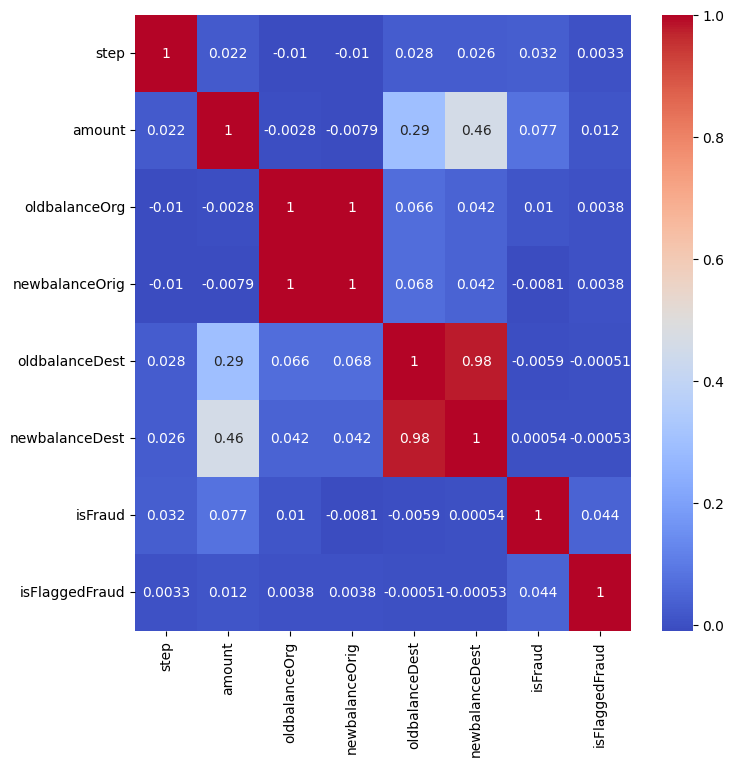

In [ ]:
plt.figure(figsize=(8, 8))
col = df[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
        'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud']]
corr = col.corr()
sns.heatmap(corr,annot=True, cmap='coolwarm')

Based on above analysis... found that nothing can be done with such imbalanced data.

Two options:
1 undersample the majority
2 oversample the minority

In [ ]:
df.columns

In [ ]:
df.drop(['step', 'nameOrig', 'nameDest'], axis=1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

In [ ]:
trans_type = pd.get_dummies(df.type)
trans_type = trans_type.astype(int)
trans_type.head()

,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0


In [ ]:
df = trans_type.join(df)
df.drop(['type'], axis = 1, inplace = True)

In [ ]:
cols = ['isFraud']
cols.extend([col for col in df.columns if col != 'isFraud'])
df = df[cols]

In [ ]:
df.head()

,isFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,0,0,0,0,1,0,9839.64,170136.0,160296.36,0.0,0.0,0
1,0,0,0,0,1,0,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,0,0,0,0,1,181.00,181.0,0.00,0.0,0.0,0
3,1,0,1,0,0,0,181.00,181.0,0.00,21182.0,0.0,0
4,0,0,0,0,1,0,11668.14,41554.0,29885.86,0.0,0.0,0


In [ ]:
X = df.drop(['isFraud'], axis=1)
y = df['isFraud']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, log_loss, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
print("DT Model: \n",classification_report(y_test, dt_pred))
print(confusion_matrix(y_test, dt_pred))

DT Model: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.91      0.90      0.91      1620

    accuracy                           1.00   1272524
   macro avg       0.95      0.95      0.95   1272524
weighted avg       1.00      1.00      1.00   1272524

[[1270758     146]
 [    154    1466]]


In [ ]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
print("NB Model: \n",classification_report(y_test, nb_pred))
print(confusion_matrix(y_test, nb_pred))

NB Model: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00   1270904
           1       0.03      0.16      0.05      1620

    accuracy                           0.99   1272524
   macro avg       0.52      0.57      0.52   1272524
weighted avg       1.00      0.99      1.00   1272524

[[1263202    7702]
 [   1368     252]]


In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
print("LR Model: \n",classification_report(y_test, lr_pred))
print(confusion_matrix(y_test, lr_pred))

LR Model: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.33      0.80      0.47      1620

    accuracy                           1.00   1272524
   macro avg       0.67      0.90      0.73   1272524
weighted avg       1.00      1.00      1.00   1272524

[[1268277    2627]
 [    321    1299]]


In [ ]:
perceptron_model = Perceptron(max_iter=1000)
perceptron_model.fit(X_train, y_train)
perceptron_pred = perceptron_model.predict(X_test)
print("Perceptron Model: \n",classification_report(y_test, perceptron_pred))
print(confusion_matrix(y_test, perceptron_pred))

Perceptron Model: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.19      0.76      0.31      1620

    accuracy                           1.00   1272524
   macro avg       0.60      0.88      0.65   1272524
weighted avg       1.00      1.00      1.00   1272524

[[1265804    5100]
 [    389    1231]]


In [ ]:
df2 = df

In [ ]:
X = df2.drop(['isFraud'], axis=1)
y = df2['isFraud']

smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
print("DT Model: \n",classification_report(y_test, dt_pred))
print(confusion_matrix(y_test, dt_pred))

DT Model: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270922
           1       1.00      1.00      1.00   1270841

    accuracy                           1.00   2541763
   macro avg       1.00      1.00      1.00   2541763
weighted avg       1.00      1.00      1.00   2541763

[[1270280     642]
 [    293 1270548]]


In [ ]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
print("NB Model: \n",classification_report(y_test, nb_pred))
print(confusion_matrix(y_test, nb_pred))

NB Model: 
               precision    recall  f1-score   support

           0       0.60      0.98      0.74   1270922
           1       0.95      0.34      0.50   1270841

    accuracy                           0.66   2541763
   macro avg       0.77      0.66      0.62   2541763
weighted avg       0.77      0.66      0.62   2541763

[[1248531   22391]
 [ 837847  432994]]


precision of class 1 increased...

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
print("LR Model: \n",classification_report(y_test, lr_pred))
print(confusion_matrix(y_test, lr_pred))

LR Model: 
               precision    recall  f1-score   support

           0       0.97      0.69      0.81   1270922
           1       0.76      0.98      0.86   1270841

    accuracy                           0.84   2541763
   macro avg       0.87      0.84      0.83   2541763
weighted avg       0.87      0.84      0.83   2541763

[[ 881023  389899]
 [  22709 1248132]]


In [ ]:
perceptron_model = Perceptron(max_iter=1000)
perceptron_model.fit(X_train, y_train)
perceptron_pred = perceptron_model.predict(X_test)
print("Perceptron Model: \n",classification_report(y_test, perceptron_pred))
print(confusion_matrix(y_test, perceptron_pred))

Perceptron Model: 
               precision    recall  f1-score   support

           0       0.97      0.70      0.81   1270922
           1       0.76      0.98      0.86   1270841

    accuracy                           0.84   2541763
   macro avg       0.87      0.84      0.84   2541763
weighted avg       0.87      0.84      0.84   2541763

[[ 887905  383017]
 [  24576 1246265]]


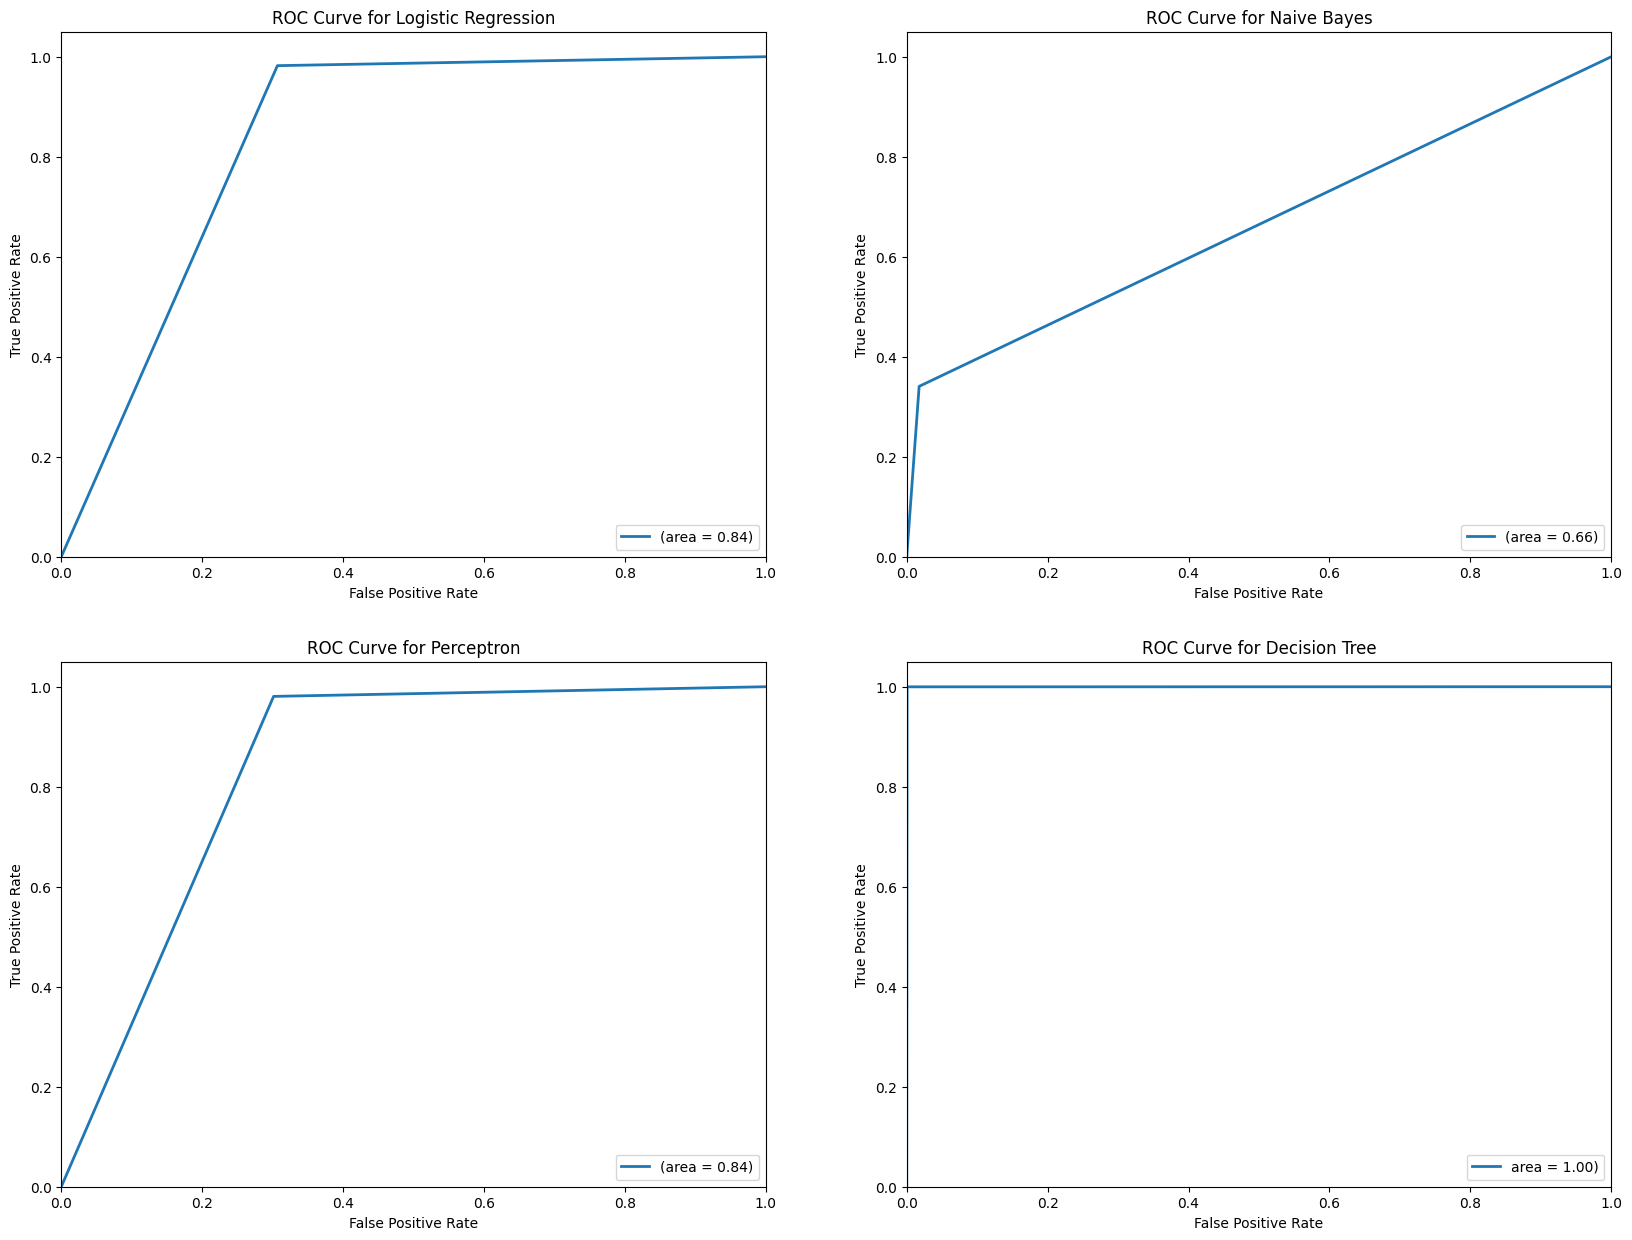

In [ ]:
plt.figure(figsize=(20,15))
fpr, tpr, _ = roc_curve(y_test, lr_pred)
roc_auc = auc(fpr, tpr)
plt.subplot(2, 2, 1)
plt.plot(fpr, tpr, lw=2, label=f'(area = {roc_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')

fpr, tpr, _ = roc_curve(y_test, nb_pred)
roc_auc = auc(fpr, tpr)
plt.subplot(2, 2, 2)
plt.plot(fpr, tpr, lw=2, label=f'(area = {roc_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes')
plt.legend(loc='lower right')

fpr, tpr, _ = roc_curve(y_test, perceptron_pred)
roc_auc = auc(fpr, tpr)
plt.subplot(2, 2, 3)
plt.plot(fpr, tpr, lw=2, label=f'(area = {roc_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Perceptron')
plt.legend(loc='lower right')

fpr, tpr, _ = roc_curve(y_test, dt_pred)
roc_auc = auc(fpr, tpr)
plt.subplot(2, 2, 4)
plt.plot(fpr, tpr, lw=2, label=f'area = {roc_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc='lower right')

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# lr_model = LogisticRegression(random_state=3)
# nb_model = GaussianNB()
# perceptron_model = Perceptron(max_iter=1000, random_state=3)
# dt_model = DecisionTreeClassifier(random_state=3)

# k = 5

# lr_cv_scores = cross_val_score(lr_model, X_train, y_train, cv=k, scoring='accuracy')
# nb_cv_scores = cross_val_score(nb_model, X_train, y_train, cv=k, scoring='accuracy')
# perceptron_cv_scores = cross_val_score(perceptron_model, X_train, y_train, cv=k, scoring='accuracy')
# dt_cv_scores = cross_val_score(dt_model, X_train, y_train, cv=k, scoring='accuracy')

# print(f'Logistic Regression (cv): {lr_cv_scores.mean():.2f}')
# print(f'Naive Bayes (cv): {nb_cv_scores.mean():.2f}')
# print(f'Perceptron (cv): {perceptron_cv_scores.mean():.2f}')
# print(f'Decision Tree (cv): {dt_cv_scores.mean():.2f}')



KeyboardInterrupt



Undersampling

In [ ]:
df3 = df

In [ ]:
class_0_samples = df3[df3['isFraud'] == 0].sample(n=8213, random_state=42)
class_1_samples = df3[df3['isFraud'] == 1].sample(n=8213, random_state=42)
df3 = pd.concat([class_0_samples, class_1_samples])

In [ ]:
X = df3.drop(['isFraud'], axis=1)
y = df3['isFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
print("DT Model: \n",classification_report(y_test, dt_pred))
print(confusion_matrix(y_test, dt_pred))

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
print("NB Model: \n",classification_report(y_test, nb_pred))
print(confusion_matrix(y_test, nb_pred))

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
print("LR Model: \n",classification_report(y_test, lr_pred))
print(confusion_matrix(y_test, lr_pred))

perceptron_model = Perceptron(max_iter=1000)
perceptron_model.fit(X_train, y_train)
perceptron_pred = perceptron_model.predict(X_test)
print("Perceptron Model: \n",classification_report(y_test, perceptron_pred))
print(confusion_matrix(y_test, perceptron_pred))

DT Model: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1642
           1       0.99      0.99      0.99      1644

    accuracy                           0.99      3286
   macro avg       0.99      0.99      0.99      3286
weighted avg       0.99      0.99      0.99      3286

[[1623   19]
 [   9 1635]]
NB Model: 
               precision    recall  f1-score   support

           0       0.58      0.98      0.73      1642
           1       0.95      0.30      0.45      1644

    accuracy                           0.64      3286
   macro avg       0.77      0.64      0.59      3286
weighted avg       0.77      0.64      0.59      3286

[[1617   25]
 [1156  488]]
LR Model: 
               precision    recall  f1-score   support

           0       0.97      0.66      0.79      1642
           1       0.74      0.98      0.84      1644

    accuracy                           0.82      3286
   macro avg       0.86      0.82     

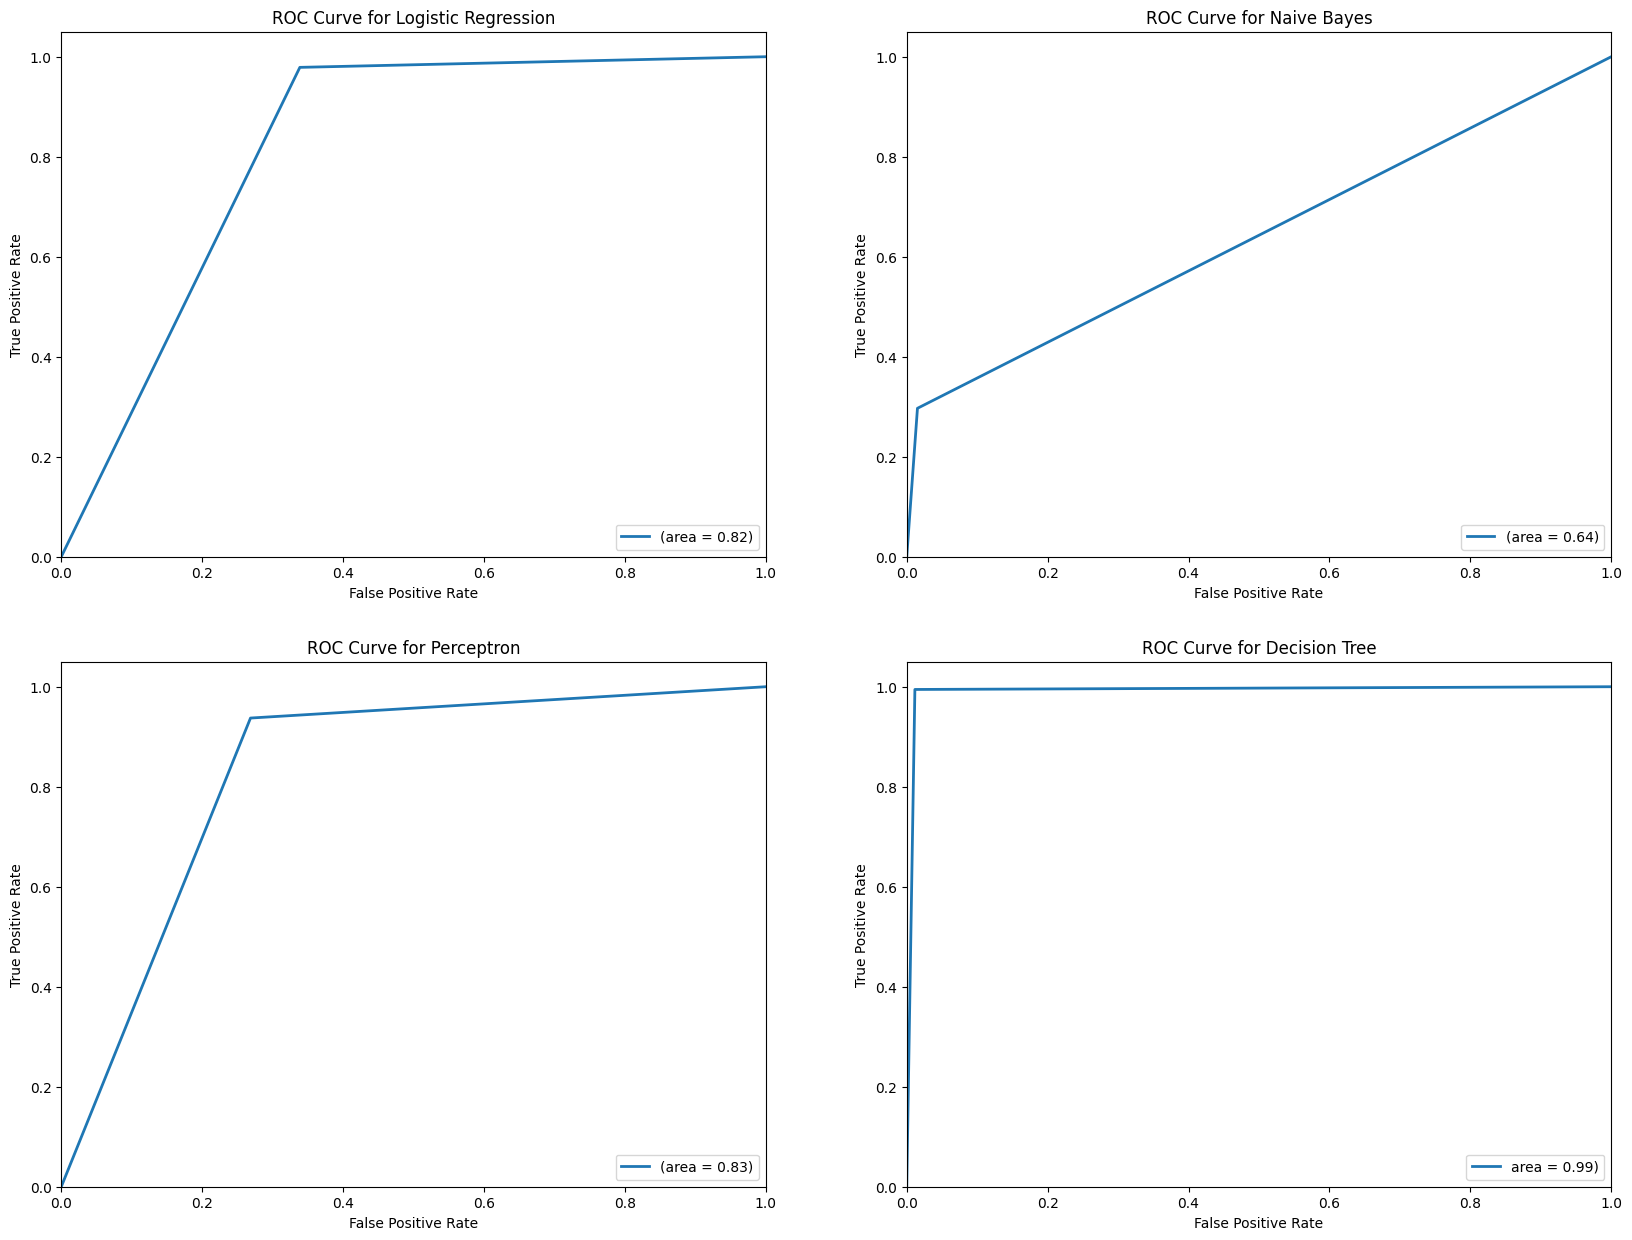

In [ ]:
plt.figure(figsize=(20,15))
fpr, tpr, _ = roc_curve(y_test, lr_pred)
roc_auc = auc(fpr, tpr)
plt.subplot(2, 2, 1)
plt.plot(fpr, tpr, lw=2, label=f'(area = {roc_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')

fpr, tpr, _ = roc_curve(y_test, nb_pred)
roc_auc = auc(fpr, tpr)
plt.subplot(2, 2, 2)
plt.plot(fpr, tpr, lw=2, label=f'(area = {roc_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes')
plt.legend(loc='lower right')

fpr, tpr, _ = roc_curve(y_test, perceptron_pred)
roc_auc = auc(fpr, tpr)
plt.subplot(2, 2, 3)
plt.plot(fpr, tpr, lw=2, label=f'(area = {roc_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Perceptron')
plt.legend(loc='lower right')

fpr, tpr, _ = roc_curve(y_test, dt_pred)
roc_auc = auc(fpr, tpr)
plt.subplot(2, 2, 4)
plt.plot(fpr, tpr, lw=2, label=f'area = {roc_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc='lower right')